# Using .melt() to reshape government data
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using `.melt()`. You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called `ur_wide`. You are encouraged to view the table in the IPython shell before beginning the exercise.

## Instructions

* Use `.melt()` to unpivot all of the columns of `ur_wide` except year and ensure that the columns with the months and values are named `month` and `unempl_rate`, respectively. Save the result as `ur_tall`.
* Add a column to `ur_tall` named `date` which combines the year and month columns as *year-month* format into a larger string, and converts it to a date data type.
* Sort `ur_tall` by date and save as `ur_sorted`.
* Using `ur_sorted`, plot `unempl_rate` on the y-axis and `date` on the x-axis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path=r'/media/documentos/Cursos/Data Science/Python/Data_Science_Python/data_sets/'

ur_wide=pd.read_csv(path+'USUnemployment.csv')
print('ur_wide \n',ur_wide.head(),'\n')

ur_wide 
    Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0  1948  3.4  3.8  4.0  3.9  3.5  3.6  3.6  3.9  3.8  3.7  3.8  4.0
1  1949  4.3  4.7  5.0  5.3  6.1  6.2  6.7  6.8  6.6  7.9  6.4  6.6
2  1950  6.5  6.4  6.3  5.8  5.5  5.4  5.0  4.5  4.4  4.2  4.2  4.3
3  1951  3.7  3.4  3.4  3.1  3.0  3.2  3.1  3.1  3.3  3.5  3.5  3.1
4  1952  3.2  3.1  2.9  2.9  3.0  3.0  3.2  3.4  3.1  3.0  2.8  2.7 



ur_tall 
    Year month  unempl_rate
0  1948   jan          3.4
1  1949   jan          4.3
2  1950   jan          6.5
3  1951   jan          3.7
4  1952   jan          3.2
5  1953   jan          2.9
6  1954   jan          4.9
7  1955   jan          4.9
8  1956   jan          4.0
9  1957   jan          4.2 

   Year month  unempl_rate       date
0  1948   jan          3.4 1948-01-01
1  1949   jan          4.3 1949-01-01
2  1950   jan          6.5 1950-01-01
3  1951   jan          3.7 1951-01-01
4  1952   jan          3.2 1952-01-01
5  1953   jan          2.9 1953-01-01
6  1954   jan          4.9 1954-01-01
7  1955   jan          4.9 1955-01-01
8  1956   jan          4.0 1956-01-01
9  1957   jan          4.2 1957-01-01


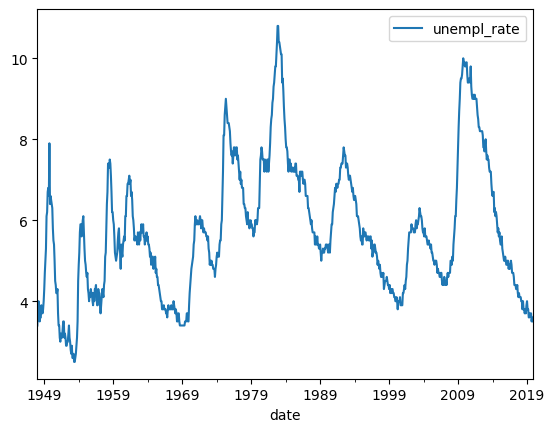

In [20]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['Year'], var_name='month', value_name='unempl_rate')
ur_tall['month']=ur_tall['month'].str.lower()
ur_tall['Year']=ur_tall['Year'].apply(str)
print('ur_tall \n',ur_tall.head(10),'\n')


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['Year'] + '-' + ur_tall['month'])
print(ur_tall.head(10))

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# Plot the unempl_rate by date
ur_sorted.plot('date','unempl_rate')
#plt.figure(figsize=(8, 2))
plt.show()